In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Apply histogram equalization on a histogram equalized image.

using the below code, you can compare between the original gray image, first equalized image and second equalized image. But besides the original gray image, you can barely see the difference between the first equalized image and second equalized image.

In [5]:
img = cv.imread('lena.jfif',0)
eq = cv.equalizeHist(img)
eq2 = cv.equalizeHist(eq)

cv.imshow('original gray image', img)
cv.imshow('first equalization', eq)
cv.imshow('second equalization', eq2)
cv.waitKey(0)
cv.destroyAllWindows()

Load the image 'electronic.jfif'. Then,

A. Experiment with different kernel size. Which kernel size is the most appropriate?

B. Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.

C. Try Laplacian of Gaussian

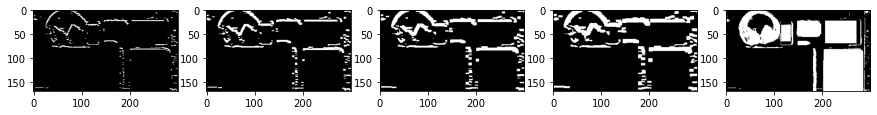

In [27]:
#A
img = cv.imread('electronic.jfif', 0)

#threshold
ret, th = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

#ksize 3
ksize3 = cv.Sobel(th, cv.CV_8U, 0, 1, ksize = 3)

#ksize 5(most appropriate)
ksize5 = cv.Sobel(th, cv.CV_8U, 0, 1, ksize = 5)

#ksize 7
ksize7 = cv.Sobel(th, cv.CV_8U, 0, 1, ksize = 7)

#ksize 9
ksize9 = cv.Sobel(th, cv.CV_8U, 0, 1, ksize = 9)

plt.figure(figsize = (15,15))
plt.subplot(1,5,1)
plt.imshow(ksize3, 'gray')
plt.subplot(1,5,2)
plt.imshow(ksize5, 'gray')
plt.subplot(1,5,3)
plt.imshow(ksize7, 'gray')
plt.subplot(1,5,4)
plt.imshow(ksize9, 'gray')
plt.subplot(1,5,5)
plt.imshow(th, 'gray')
plt.show()

In [31]:
#B
#sobel x and sobel y without gaussian blur
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)

grad_mag = cv.magnitude(sobelx, sobely)
grad_mag = cv.convertScaleAbs(grad_mag)

#sobel x and sobel y with gaussian blur
blur = cv.GaussianBlur(img, (5,5), 0)
sobelx_blur = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize = 3)
sobely_blur = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize = 3)

grad_mag_blur = cv.magnitude(sobelx_blur, sobely_blur)
grad_mag_blur = cv.convertScaleAbs(grad_mag_blur)

cv.imshow('result', np.hstack((grad_mag, grad_mag_blur)))
cv.waitKey(0)
cv.destroyAllWindows()

In [34]:
#C
#comparison with sobel x and y and laplacian
laplacian = cv.Laplacian(blur, cv.CV_32F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

cv.imshow('laplacian', np.hstack((grad_mag_blur ,laplacian_8u)))
cv.waitKey(0)
cv.destroyAllWindows()

#Use gaussian blur to reduce noice, then use laplacian because laplacian provides more compact and precise lines when
#showing the edges, sobel x and sobel y produces thicks lines for showing edges which might cover off some details.

Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [8]:
img = cv.imread('pineapple.jfif', 0)
blur = cv.GaussianBlur(img, (5,5), 0)

#sobel (able to detect the clouds behind it clearly)
sobelx = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize = 3)

grad_mag = cv.magnitude(sobelx, sobely)
grad_mag = cv.convertScaleAbs(grad_mag)

#laplacian (can vaguely see the clouds being detected)
laplacian = cv.Laplacian(blur, cv.CV_32F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

#canny operator

cv.imshow('img', np.hstack((img, grad_mag, laplacian_8u)))
cv.waitKey(0)
cv.destroyAllWindows()


In [34]:
# able to get all edges as the threshold value gets smaller, more flexibility
ratio = 2
kernel_size = 3

def thresh_callback(val):
    thresh = val
    
    canny_output = cv.Canny(gray, thresh, ratio*thresh, kernel_size)
    mask = canny_output != 0
    dst = img*(mask[:,:,None].astype(img.dtype))
    
    cv.imshow('window', dst)
    
img = cv.imread('pineapple.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#define another window
name_window = 'source'
cv.namedWindow(name_window)
cv.imshow(name_window, img)

max_thresh = 200
thresh = max_thresh//2
cv.createTrackbar('Canny threshold', name_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)

cv.waitKey(0)
cv.destroyAllWindows()

Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [70]:
img = cv.imread('electronic.jfif', 0)

#thresholding
img_blur = cv.GaussianBlur(img, (3,3), 0)
ret, th = cv.threshold(img_blur, 197, 255, cv.THRESH_BINARY)

#find contour
contour, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#draw contour
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.drawContours(img_bgr, contour, -1, (0, 255, 0), 2)

cv.imshow('contour', img_bgr)
cv.waitKey(0)
cv.destroyAllWindows()